In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [31]:
actual_frequencies_file = '../frequencies/source/southeast_asia_genotype_frequencies.csv'
fitness_file = '../frequencies/southeast_asia/genotype/all_effects/seAsia_genotype_allEffects_fitness.csv'
predicted_frequencies_file = '../frequencies/southeast_asia/genotype/all_effects/seAsia_genotype_allEffects_predicted_freqs.csv'

In [32]:
actual_frequencies = pd.read_csv(actual_frequencies_file, index_col=0)
predicted_frequencies = pd.read_csv(predicted_frequencies_file, index_col=0)
fitness = pd.read_csv(fitness_file, index_col=0)

colors = pickle.load(open('./colors.p', 'rb'))
names = pickle.load(open('./names.p', 'rb'))

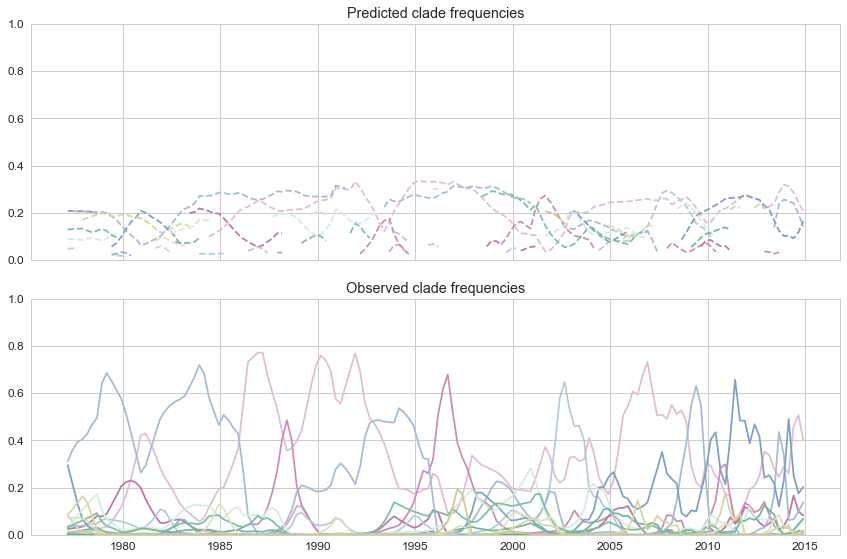

In [37]:
sns.set(style='whitegrid', font_scale=1.2)

def plot_frequencies(actual_frequencies, predicted_frequencies):
    sns.set_palette('tab20', n_colors=20)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=True, sharey=True)
    for clade, predicted_freqs in predicted_frequencies.iteritems():
        c = colors[clade]
        date_min, date_max = predicted_freqs.index.min(), predicted_freqs.index.max()
        axes[0].plot(predicted_freqs.index.values,predicted_freqs.values, linestyle='--', color=c,label='Predicted %s frequencies'%clade)

        actual_freqs = actual_frequencies[clade][date_min:date_max]
        axes[1].plot(actual_freqs.index.values, actual_freqs.values, color=c,label='Actual %s frequencies'%clade)

    axes[0].set_ylim(0,1)
    axes[1].set_ylim(0,1)
    axes[0].set_title('Predicted clade frequencies')
    axes[1].set_title('Observed clade frequencies')

    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.close()

plot_frequencies(actual_frequencies, predicted_frequencies)